$\newcommand{\xbf}{{\bf x}}
\newcommand{\ybf}{{\bf y}}
\newcommand{\wbf}{{\bf w}}
\newcommand{\Ibf}{\mathbf{I}}
\newcommand{\Vbf}{\mathbf{V}}
\newcommand{\Xbf}{\mathbf{X}}
\newcommand{\Rbb}{\mathbb{R}}
\newcommand{\Phibf}{\pmb{\Phi}}
\newcommand{\vec}[1]{\left[\begin{array}{c}#1\end{array}\right]}
$

# Introduction aux réseaux de neurones : Vers l'apprentissage de représentations
Matériel de cours rédigé par Pascal Germain, 2018
************

In [1]:
import numpy as np
import aidecours
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles

from aidecours import code_button as CB
aidecours.center_images(); CB()

## Limitations des prédicteurs linéaires
Le réseau simple étudié jusqu'à maintenant ne peut que générer des prédicteurs **linéaires**.

(de la forme $\wbf\cdot\xbf + b$)

<p>
<center><img src="images/reseau_simple_biais.png"/></center>

À titre d'exemple, considérons ce problème de classification en deux dimensions, généré à l'aide de la fonction
`sklearn.datasets.make_circles` 

(voir: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)

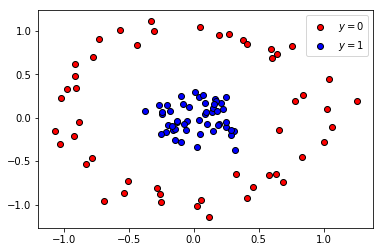

In [2]:
x, y = make_circles(n_samples=100, noise=.1, factor=0.2, random_state=10)
aidecours.show_2d_dataset(x, y); CB()

Voici le résultat de la régression logistique.

$$
\min_{\wbf,b} \left[\frac1n \sum_{i=1}^n - y_i (\wbf\cdot\xbf_i+b) + \log(1+e^{\wbf\cdot\xbf_i+b})+ \frac\lambda2\|\wbf\|^2\right].
$$ 

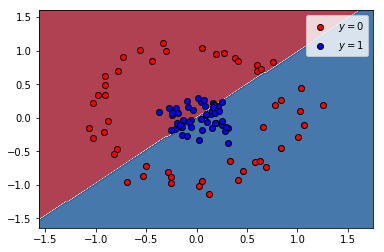

In [3]:
from sklearn.linear_model import LogisticRegression
algo = LogisticRegression()
algo.fit(x, y)
coord = aidecours.show_2d_predictions(x, y, algo.predict) 
CB()

Transformons les données en leur appliquant une fonction $\Phibf:\Rbb^2\to\Rbb^4$:

$${\Phibf} : \vec{x_1 \\ x_2} \, \mapsto \, \vec{x_1 \\ x_2 \\ x_1^2\\ x_2^2}$$



<center><img src="images/reseau_simple_phi.png"/></center>

Appliquons maintennt la régression logistique sur l'ensemble transformé:

$$
\min_{\wbf,b} \left[\frac1n \sum_{i=1}^n - y_i (\wbf\cdot\Phibf(\xbf_i)+b) + \log(1+e^{\wbf\cdot\Phibf(\xbf_i)+b})+ \frac\lambda2\|\wbf\|^2\right].
$$ 

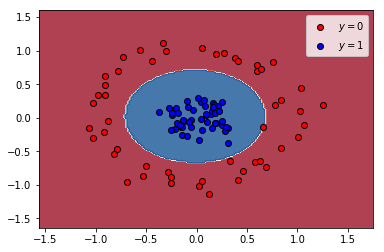

In [4]:
def phi(x):
    return np.hstack((x, (x[:,0]**2).reshape(-1,1), (x[:,1]**2).reshape(-1,1)))

algo = LogisticRegression()
algo.fit(phi(x), y)
aidecours.show_2d_predictions(x, y, lambda a: algo.predict(phi(a))) 
CB()

## Réseau à une couche cachée

En ajoutant une **couche cachée** au réseau de neurone, nous lui permettons *d'apprendre* la fonction de transformation appropriée.

<p>
<center><img src="images/reseau_simple_2couches.png"/></center>

Le réseau $R_{\Vbf,\wbf}(\xbf) = f\Big(\wbf\, h\big(\Vbf \xbf\big)\Big)$ ci-dessus est paramêtré par une matrice $\Vbf$ et un vecteur $\wbf$:

$$\xbf = \vec{x_1\\x_2} ; \quad
\Vbf=\vec{v_{11} & v_{12} \\
          v_{21} & v_{22} \\ 
          \vdots & \vdots \\
          v_{D1} & v_{D2} }; \quad
\wbf = \vec{w_1 & w_2 & \cdots& w_D}
$$



## Fonction d'activation
Nous avons déjà vu deux choix pour la *fonction d'activation* de la sortie du réseau:
* La fonction linéaire: $f(a) = a$
* La fonction sigmoïdale $f(a) = \sigma(a) = \dfrac{1}{1+e^{-a}}\,.$

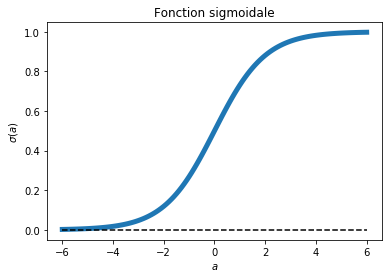

In [5]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))
   
aidecours.show_1d_function(sigmoid, -6, 6, constante_x=0, linewidth=5); 
plt.title('Fonction sigmoidale'); plt.xlabel('$a$'); plt.ylabel('$\sigma(a)$'); CB()

## Fonction d'activation

<center><img src="images/reseau_simple_2couches.png"/></center>

Nous examinerons deux choix possible de fonction $h$ pour la couche cachée:
* La tangente hyperbolique (tanh)
* La *rectified linear unit* (ReLU)

### Tangente hyperbolique

$$h(x) = \tanh(x) = 2\sigma\big(2x\big) - 1$$

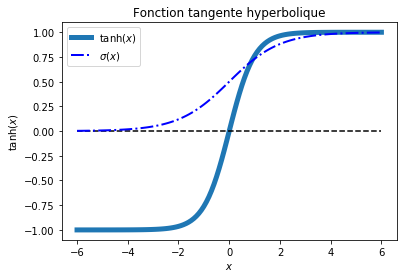

In [6]:
aidecours.show_1d_function(np.tanh, -6, 6, constante_x=0, linewidth=5, label='$\\tanh(x)$'); 
aidecours.show_1d_function(lambda x: sigmoid(x), -6, 6, c='b', linestyle='-.', linewidth=2, label='$\sigma(x)$'); 
plt.title('Fonction tangente hyperbolique'); plt.xlabel('$x$'); plt.ylabel('$\mathrm{tanh}(x)$'); CB()

### Rectified Linear Unit (ReLU)
$$h(x) = \mathrm{relu}(x) = \max(0, x)$$

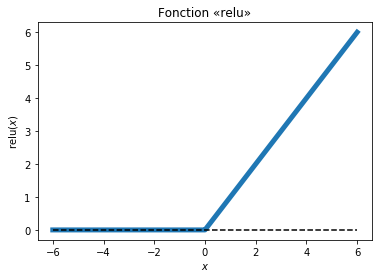

In [7]:
def relu(x):
    return np.maximum(0, x)
aidecours.show_1d_function(relu, -6, 6, constante_x=0, linewidth=5); 
plt.title('Fonction «relu»'); plt.xlabel('$x$'); plt.ylabel('$\mathrm{relu}(x)$'); CB()

## Quelques exemples de prédictions de réseaux de neurones

#### 4 neurones sur la couche cachée, fonction d'activation ReLU

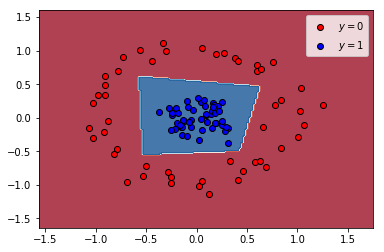

In [8]:
from sklearn.neural_network import MLPClassifier
algo = MLPClassifier(activation='relu', solver='lbfgs', alpha=0.01, hidden_layer_sizes=(4,), random_state=1)
algo.fit(x, y)
aidecours.show_2d_predictions(x, y, algo.predict); CB()

#### 10 neurones sur la couche cachée, fonction d'activation ReLU

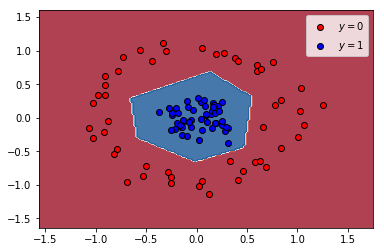

In [9]:
algo = MLPClassifier(activation='relu', solver='lbfgs', alpha=0.01, hidden_layer_sizes=(10,), random_state=1)
algo.fit(x, y)
aidecours.show_2d_predictions(x, y, algo.predict); CB()

#### 10 neurones sur la couche cachée, fonction d'activation tanh

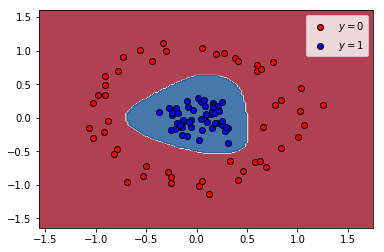

In [10]:
algo = MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.01, hidden_layer_sizes=(10,), random_state=1)
algo.fit(x, y)
aidecours.show_2d_predictions(x, y, algo.predict); CB()